<a href="https://colab.research.google.com/github/ripky/OFA/blob/main/QUIS_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#upload files menggunakan packages 
from google.colab import files
upload = files.upload()
upload

Saving Customer.csv to Customer.csv
Saving prod_cat_info.csv to prod_cat_info.csv
Saving Transactions.csv to Transactions.csv


{'Customer.csv': b'customer_Id,DOB,Gender,city_code\r\n268408,02-01-1970,M,4\r\n269696,07-01-1970,F,8\r\n268159,08-01-1970,F,8\r\n270181,10-01-1970,F,2\r\n268073,11-01-1970,M,1\r\n273216,15-01-1970,F,5\r\n266929,15-01-1970,M,8\r\n275152,16-01-1970,M,4\r\n275034,18-01-1970,F,4\r\n273966,21-01-1970,M,8\r\n270829,22-01-1970,F,8\r\n266997,23-01-1970,M,9\r\n272455,25-01-1970,M,7\r\n274593,26-01-1970,M,10\r\n273391,29-01-1970,F,2\r\n267657,29-01-1970,F,7\r\n271344,29-01-1970,F,5\r\n268275,01-02-1970,F,7\r\n274630,01-02-1970,M,4\r\n273541,01-02-1970,M,4\r\n270324,01-02-1970,F,1\r\n273613,06-02-1970,M,1\r\n271608,09-02-1970,F,4\r\n269008,13-02-1970,F,6\r\n267199,14-02-1970,,2\r\n267916,17-02-1970,F,8\r\n267609,18-02-1970,M,2\r\n270602,18-02-1970,M,5\r\n272883,19-02-1970,M,5\r\n272359,19-02-1970,M,4\r\n272603,19-02-1970,F,9\r\n272028,20-02-1970,F,1\r\n274717,21-02-1970,M,7\r\n273316,21-02-1970,M,2\r\n271262,21-02-1970,M,2\r\n267166,22-02-1970,F,4\r\n270827,04-03-1970,F,10\r\n273423,04-03-1970,F

In [5]:
#panggil masing masing data/read
Transactions= pd.read_csv('Transactions.csv')
Customer =pd.read_csv('Customer.csv')
Prod = pd.read_csv('prod_cat_info.csv')

In [6]:
#gabungkan data dengan fungsi merge
transaction_customer = pd.merge(Transactions,Customer,left_on='cust_id',right_on='customer_Id')
data = pd.merge(transaction_customer,Prod,left_on=['prod_subcat_code','prod_cat_code'] ,right_on=['prod_cat_code', 'prod_cat_code'])

In [ ]:
#print data
data

In [7]:
#cek data yang hilang 
data.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               6
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [8]:
#menghapus kolom data yang hilang 
data.dropna(inplace=True)

In [9]:
#cek kembali data yang kosong
data.isna().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               0
city_code            0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [10]:
#mendiskripsikan data keseluruhan 
data.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,4.999000e+03,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,5.060428e+10,271024.033607,2.194239,2.194239,2.375475,614.177636,252.054401,2049.678846,271024.033607,5.613923,2.600320
std,2.893407e+10,2431.523746,1.468653,1.468653,2.382754,636.137375,190.819457,2620.721577,2431.523746,2.859203,1.356106
min,1.086136e+07,266794.000000,1.000000,1.000000,-5.000000,-1488.000000,7.455000,-8154.900000,266794.000000,1.000000,1.000000
25%,2.625969e+10,268969.000000,1.000000,1.000000,1.000000,293.000000,94.710000,704.990000,268969.000000,3.000000,1.000000
50%,5.007761e+10,271004.000000,1.000000,1.000000,3.000000,670.000000,202.230000,1720.485000,271004.000000,6.000000,3.000000
75%,7.610854e+10,273172.000000,4.000000,4.000000,4.000000,1102.500000,367.605000,3552.575000,273172.000000,8.000000,4.000000
max,9.998675e+10,275261.000000,4.000000,4.000000,5.000000,1499.000000,786.975000,8281.975000,275261.000000,10.000000,4.000000


In [11]:
#melihat jumlah data pada variabel gender 
sex =data['Gender'].value_counts()
sex

M    2587
F    2412
Name: Gender, dtype: int64

In [ ]:
#membuat variabel gender menjadi variabel dummy
gender_dummies=pd.get_dummies(data['Gender'])
#print dan melihat jumlah variabel yang d rubahh pada awal
gender_dummies.head(20)

In [13]:
#menggabungkan variabel dummy dengan dataset di awal
data=pd.concat([data,gender_dummies],axis=1)
data.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,F,M
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens,0,1
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,0,1


In [ ]:
#untuk melihat jumlah data kategori pada variabel prod_cat
data['prod_cat'].value_counts()

Clothing    3009
Bags        1990
Name: prod_cat, dtype: int64

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

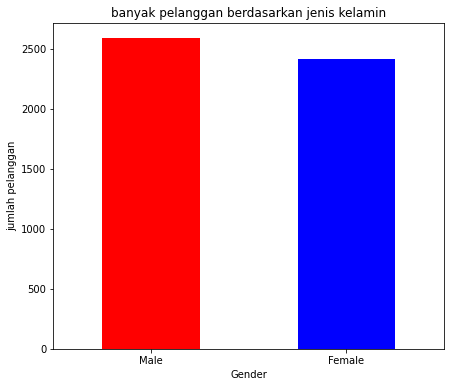

In [ ]:
#diagram batang
#untuk membuat ukuran box
plt.figure(figsize=(7, 6))
#kode untuk membuat bar pllot pada variabel sex dengan warna yang berbeda
ax = sex.plot(kind='bar', rot=0, color=["red","blue"])
#membuat judul pada diagram batang
ax.set_title("banyak pelanggan berdasarkan jenis kelamin", y = 1)
#untuk memberi nama garis X
ax.set_xlabel('Gender')
#untuk memberi nama garis Y
ax.set_ylabel('jumlah pelanggan')
#untuk memberi nama pada tiap diagram batang
ax.set_xticklabels(('Male', 'Female'))

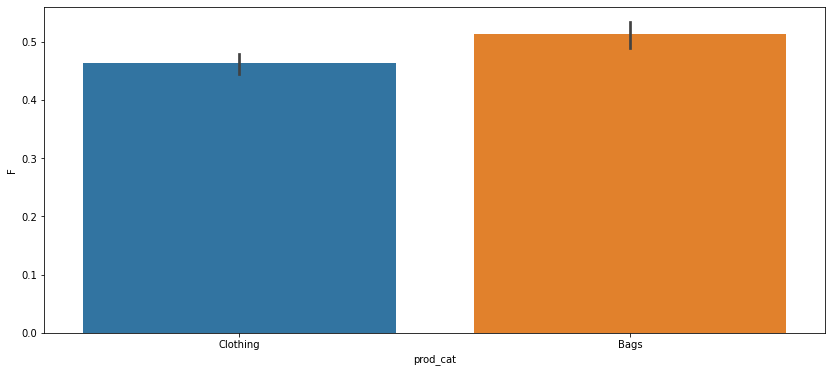

In [14]:
plt.figure(figsize=(14,6))
#diagram batang variabel prod_cat dengan male/jenis kelamin perempuan 
sns.barplot(x='prod_cat',y='F',data=data)

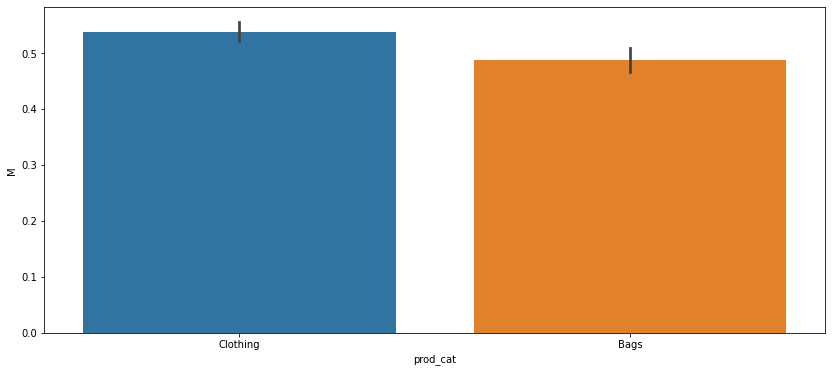

In [ ]:
#diagram batang variabel prod_cat dengan male/jenis kelamin laki laki
plt.figure(figsize=(14,6))
sns.barplot(x='prod_cat',y='M',data=data)

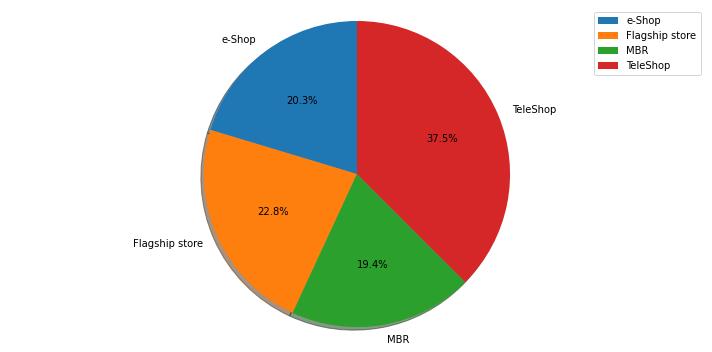

In [ ]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,5))
#memasukan variabel dalam jumlah persen dan mendiskrisipkan terhadap story_type
ax1.pie(data.groupby('Store_type')['total_amt'].sum(),explode=None, labels=data['Store_type'].unique(), autopct='%1.1f%%',shadow=True, startangle=90)

# Equal digunakan agar pie chart berbentuk lingkaran
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
#menambahkan variabel baru month berdasarkan hari transaksi
data['month'] = pd.DatetimeIndex(data['tran_date']).month
data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,F,M,month
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens,0,1,2
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,0,1,2
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids,0,1,2
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens,0,1,2
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,18727956164,267161,23-02-2011,4,4,5,668,350.70,3690.70,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women,0,1,2
5001,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,1,Mens,1,0,2
5002,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women,1,0,2
5003,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,273723,21-01-1984,F,4.0,Bags,1,Mens,1,0,1


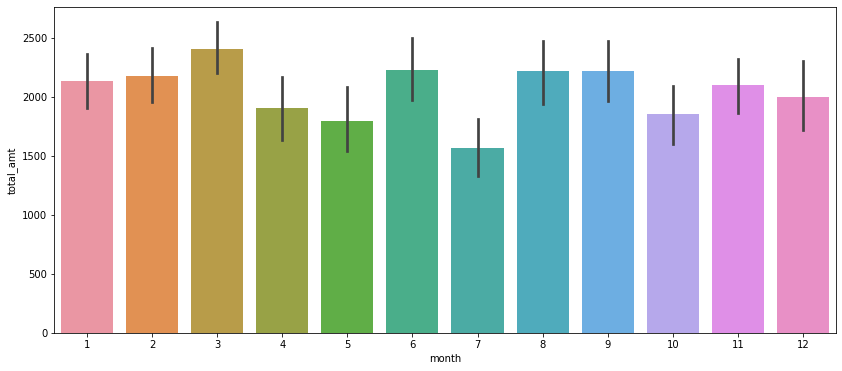

In [ ]:
#diagram batang total amount terhadap bulan penjualan selama satu tahun
plt.figure(figsize=(14,6))
sns.barplot(x='month',y='total_amt',data=data)